In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
# add csv file
data_salaries_cleaned_csv = Path("../Resources/data_salaries_cleaned.csv")

In [17]:
# read csv
data_salaries_cleaned = pd.read_csv(data_salaries_cleaned_csv)
data_salaries_cleaned["job_title"].value_counts()

job_title
Data Engineer                         1645
Data Scientist                        1423
Data Analyst                          1026
Machine Learning Engineer              697
Applied Scientist                      225
                                      ... 
Software Data Engineer                   1
Compliance Data Analyst                  1
Business Intelligence Data Analyst       1
BI Data Engineer                         1
Principal Data Analyst                   1
Name: count, Length: 96, dtype: int64

In [63]:
# filter by job title
data_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Engineer")]
data_scientists = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Scientist")]
data_analysts = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Analyst")]
machine_learning_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Machine Learning Engineer")]
data_engineers

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
4,2023,SE,FT,Data Engineer,190000,0,M
5,2023,SE,FT,Data Engineer,170000,0,M
8,2023,SE,FT,Data Engineer,130000,100,M
9,2023,SE,FT,Data Engineer,101570,100,M
10,2023,MI,FT,Data Engineer,150000,100,M
...,...,...,...,...,...,...,...
6707,2021,MI,FT,Data Engineer,93150,0,M
6716,2021,MI,FT,Data Engineer,22000,0,L
6728,2021,SE,FT,Data Engineer,165000,0,M
6730,2020,MI,FT,Data Engineer,110000,100,L


In [72]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = data_engineers["salary"].quantile([.25,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_bound

19850.0

In [73]:
data_engineers["salary"].min()

22000

In [39]:
# get average for each experience level in each job title
data_engineer_salaries = data_engineers.groupby(["experience_level"])["salary"].mean()
data_scientist_salaries = data_scientists.groupby(["experience_level"])["salary"].mean()
data_analyst_salaries = data_analysts.groupby(["experience_level"])["salary"].mean()
machine_learning_engineer_salaries = machine_learning_engineers.groupby(["experience_level"])["salary"].mean()

In [50]:
salaries_by_experience_level = pd.DataFrame({"Data Analyst": data_analyst_salaries,
                                            "Data Scientist": data_scientist_salaries,
                                            "Data Engineer": data_engineer_salaries,
                                            "Machine Learning": machine_learning_engineer_salaries})

# salaries_by_experience_level["Data Engineers"] = salaries_by_experience_level["Data Engineers"].map("${:,.2f}".format)
# salaries_by_experience_level["Data Scientists"] = salaries_by_experience_level["Data Scientists"].map("${:,.2f}".format)
# salaries_by_experience_level["Data Analysts"] = salaries_by_experience_level["Data Analysts"].map("${:,.2f}".format)
# salaries_by_experience_level["Machine Learning"] = salaries_by_experience_level["Machine Learning"].map("${:,.2f}".format)

salaries_by_experience_level = salaries_by_experience_level.reindex(["EN", "MI", "SE", "EX"])
salaries_by_experience_level

,Data Analyst,Data Scientist,Data Engineer,Machine Learning
experience_level,,,,
EN,75685.428571,104584.422222,109101.880597,139916.454545
MI,105424.676724,150403.233533,129740.720000,168484.183333
SE,121855.477591,173550.033698,159891.545968,195393.420968
EX,107000.000000,190420.833333,195691.250000,190950.000000


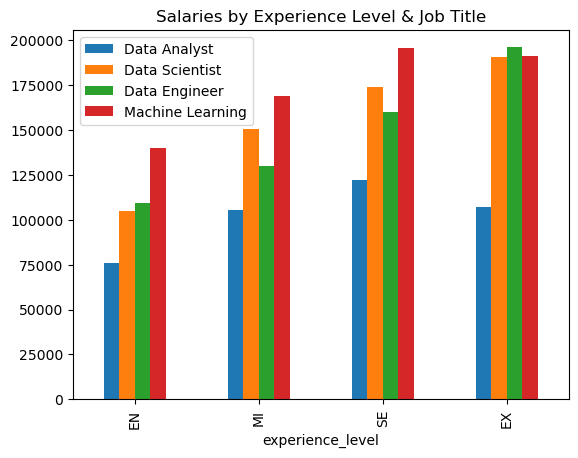

In [51]:
salaries_by_experience_level.plot(kind="bar", title="Salaries by Experience Level & Job Title")
plt.show()